In [1]:
import pandas as pd
import glob
import os

# Define folder path
folder_path = "/Users/dougs/Annapurna Dropbox/Doug Sack/Interactive/IndieBI/sales_curve_data/"

# Get all .xlsx files in the folder
files = glob.glob(f"{folder_path}/*.xlsx")

# Read all files into DataFrames and add filename column
dfs = [pd.read_excel(file).assign(Source=os.path.basename(file)) for file in files]




In [2]:
# Combine all files into one DataFrame
df = pd.concat(dfs, ignore_index=True)



In [3]:
df.Source.unique()

array(['nintendo.xlsx', 'epic.xlsx', 'steam.xlsx', 'PS.xlsx'],
      dtype=object)

In [4]:
df['Date'] = pd.to_datetime(df["Date"])


In [5]:
df_combined = df.query("Source =='steam.xlsx'")
#df_combined = df.query("Source =='PS.xlsx'")
#df_combined = df.query("Source =='epic.xlsx'")
#df_combined = df.query("Source =='nintendo.xlsx'")


In [6]:

df_combined["Earliest Date"] = df_combined.groupby(["product"])["Date"].transform("min")

/var/folders/vh/qvl8gx_d2m370qv72srt5r1m0000gp/T/ipykernel_3043/3602302442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined["Earliest Date"] = df_combined.groupby(["product"])["Date"].transform("min")


In [7]:
df_combined["DAR"] = (df_combined["Date"] - df_combined["Earliest Date"]).dt.days
df_combined = df_combined.query("DAR <=365")


/var/folders/vh/qvl8gx_d2m370qv72srt5r1m0000gp/T/ipykernel_3043/3128699153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined["DAR"] = (df_combined["Date"] - df_combined["Earliest Date"]).dt.days


In [8]:
df_combined["CUME_total"] = df_combined.groupby(["product"])["Cumulative Selected Measure"].transform("max")

In [9]:
df_combined["prop_of_total"] = df_combined["Cumulative Selected Measure"] / df_combined["CUME_total"]


In [10]:
df_combined

Date                      product  Cumulative Selected Measure  \
65316  2017-04-24  What Remains of Edith Finch                      7717.21   
65317  2017-04-25  What Remains of Edith Finch                     39980.37   
65318  2017-04-26  What Remains of Edith Finch                     56391.93   
65319  2017-04-27  What Remains of Edith Finch                     70292.63   
65320  2017-04-28  What Remains of Edith Finch                     86642.80   
...           ...                          ...                          ...   
113589 2025-02-10   Lorelei and the Laser Eyes                   1276732.15   
113593 2025-02-10                   Open Roads                    124179.60   
113614 2025-02-11                        Flock                    101658.06   
113624 2025-02-11   Lorelei and the Laser Eyes                   1276732.15   
113628 2025-02-11                   Open Roads                    124179.60   

            Source Earliest Date  DAR  CUME_total  prop_of_total  
65316   steam.xlsx    2017-04-24    0  2700909.04       0.002857  
65317   steam.xlsx    2017-04-24    1  2700909.04       0.014803  
65318   steam.xlsx    2017-04-24    2  2700909.04       0.020879  
65319   steam.xlsx    2017-04-24    3  2700909.04       0.026026  
65320   steam.xlsx    2017-04-24    4  2700909.04       0.032079  
...            ...           ...  ...         ...            ...  
113589  steam.xlsx    2024-05-16  270  1276732.15       1.000000  
113593  steam.xlsx    2024-03-28  319   124179.60       1.000000  
113614  steam.xlsx    2024-07-16  210   101658.06       1.000000  
113624  steam.xlsx    2024-05-16  271  1276732.15       1.000000  
113628  steam.xlsx    2024-03-28  320   124179.60       1.000000  

[12516 rows x 8 columns]

In [11]:
df_combined.query("product=='Flower'")

Date product  Cumulative Selected Measure      Source  \
66575 2019-02-14  Flower                     14031.57  steam.xlsx   
66579 2019-02-15  Flower                     31455.67  steam.xlsx   
66583 2019-02-16  Flower                     42915.91  steam.xlsx   
66587 2019-02-17  Flower                     51714.32  steam.xlsx   
66591 2019-02-18  Flower                     59250.82  steam.xlsx   
...          ...     ...                          ...         ...   
68378 2020-02-10  Flower                    226216.10  steam.xlsx   
68386 2020-02-11  Flower                    226341.35  steam.xlsx   
68394 2020-02-12  Flower                    226484.19  steam.xlsx   
68403 2020-02-13  Flower                    226621.20  steam.xlsx   
68412 2020-02-14  Flower                    226881.28  steam.xlsx   

      Earliest Date  DAR  CUME_total  prop_of_total  
66575    2019-02-14    0   226881.28       0.061845  
66579    2019-02-14    1   226881.28       0.138644  
66583    2019-02-14    2   226881.28       0.189156  
66587    2019-02-14    3   226881.28       0.227936  
66591    2019-02-14    4   226881.28       0.261153  
...             ...  ...         ...            ...  
68378    2019-02-14  361   226881.28       0.997068  
68386    2019-02-14  362   226881.28       0.997620  
68394    2019-02-14  363   226881.28       0.998250  
68403    2019-02-14  364   226881.28       0.998854  
68412    2019-02-14  365   226881.28       1.000000  

[366 rows x 8 columns]

In [12]:
df_combined.query("product =='Stray'").sort_values("DAR")

Date product  Cumulative Selected Measure      Source  \
82881 2022-06-02   Stray                    308197.70  steam.xlsx   
82907 2022-06-03   Stray                    784343.59  steam.xlsx   
82933 2022-06-04   Stray                   1081081.74  steam.xlsx   
82959 2022-06-05   Stray                   1336823.38  steam.xlsx   
82985 2022-06-06   Stray                   1540716.52  steam.xlsx   
...          ...     ...                          ...         ...   
93113 2023-05-29   Stray                  59792575.14  steam.xlsx   
93143 2023-05-30   Stray                  59804323.24  steam.xlsx   
93173 2023-05-31   Stray                  59816613.12  steam.xlsx   
93203 2023-06-01   Stray                  59830876.08  steam.xlsx   
93233 2023-06-02   Stray                  59846403.59  steam.xlsx   

      Earliest Date  DAR   CUME_total  prop_of_total  
82881    2022-06-02    0  59846403.59       0.005150  
82907    2022-06-02    1  59846403.59       0.013106  
82933    2022-06-02    2  59846403.59       0.018064  
82959    2022-06-02    3  59846403.59       0.022338  
82985    2022-06-02    4  59846403.59       0.025745  
...             ...  ...          ...            ...  
93113    2022-06-02  361  59846403.59       0.999101  
93143    2022-06-02  362  59846403.59       0.999297  
93173    2022-06-02  363  59846403.59       0.999502  
93203    2022-06-02  364  59846403.59       0.999741  
93233    2022-06-02  365  59846403.59       1.000000  

[366 rows x 8 columns]

In [13]:

title = df_combined.query("product !='Stray'")

In [14]:
title

Date                      product  Cumulative Selected Measure  \
65316  2017-04-24  What Remains of Edith Finch                      7717.21   
65317  2017-04-25  What Remains of Edith Finch                     39980.37   
65318  2017-04-26  What Remains of Edith Finch                     56391.93   
65319  2017-04-27  What Remains of Edith Finch                     70292.63   
65320  2017-04-28  What Remains of Edith Finch                     86642.80   
...           ...                          ...                          ...   
113589 2025-02-10   Lorelei and the Laser Eyes                   1276732.15   
113593 2025-02-10                   Open Roads                    124179.60   
113614 2025-02-11                        Flock                    101658.06   
113624 2025-02-11   Lorelei and the Laser Eyes                   1276732.15   
113628 2025-02-11                   Open Roads                    124179.60   

            Source Earliest Date  DAR  CUME_total  prop_of_total  
65316   steam.xlsx    2017-04-24    0  2700909.04       0.002857  
65317   steam.xlsx    2017-04-24    1  2700909.04       0.014803  
65318   steam.xlsx    2017-04-24    2  2700909.04       0.020879  
65319   steam.xlsx    2017-04-24    3  2700909.04       0.026026  
65320   steam.xlsx    2017-04-24    4  2700909.04       0.032079  
...            ...           ...  ...         ...            ...  
113589  steam.xlsx    2024-05-16  270  1276732.15       1.000000  
113593  steam.xlsx    2024-03-28  319   124179.60       1.000000  
113614  steam.xlsx    2024-07-16  210   101658.06       1.000000  
113624  steam.xlsx    2024-05-16  271  1276732.15       1.000000  
113628  steam.xlsx    2024-03-28  320   124179.60       1.000000  

[12150 rows x 8 columns]

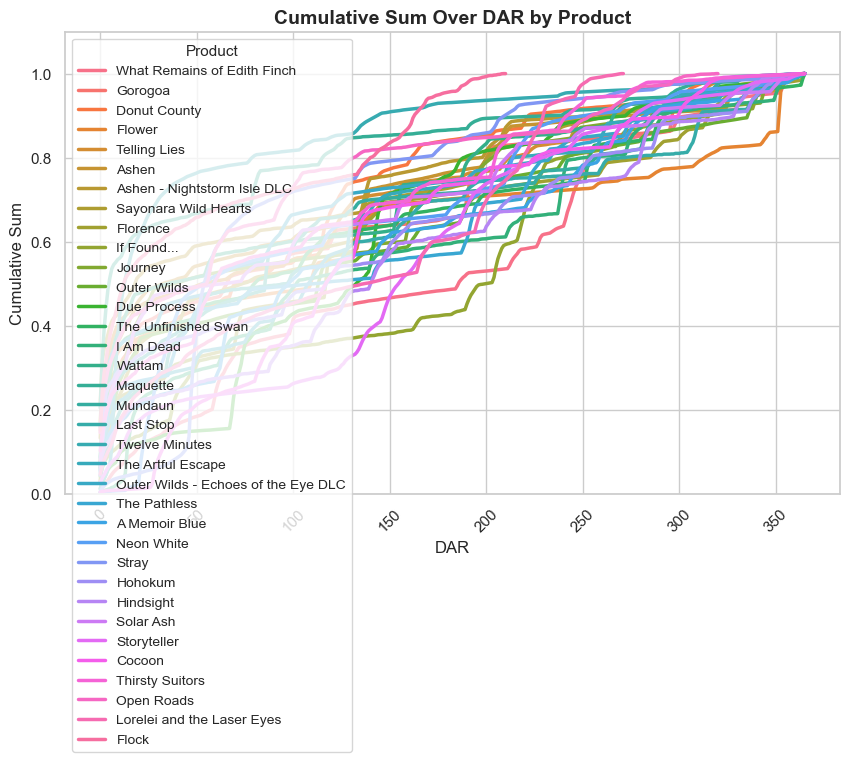

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_combined, x='DAR', y='prop_of_total', hue='product', linewidth=2.5)

# Improve labels and title
ax.set_xlabel("DAR", fontsize=12)
ax.set_ylabel("Cumulative Sum", fontsize=12)
ax.set_title("Cumulative Sum Over DAR by Product", fontsize=14, fontweight='bold')

# Improve legend
ax.legend(title="Product", fontsize=10, title_fontsize=11, loc="upper left", frameon=True)

# Rotate x-axis if needed
plt.xticks(rotation=45)
plt.ylim(0,1.1)

# Show plot
plt.show()

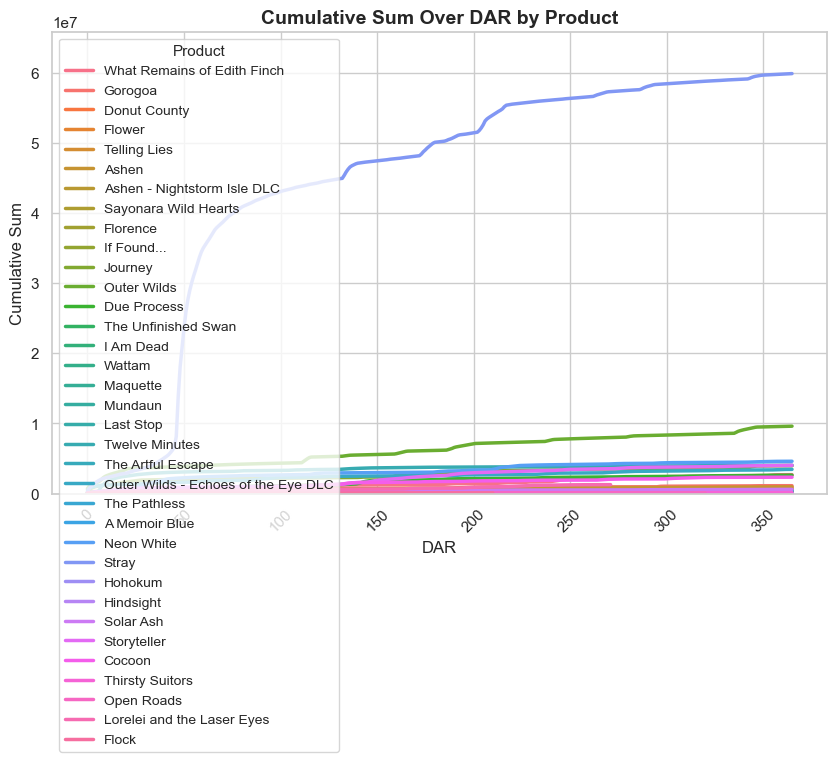

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_combined, x='DAR', y='Cumulative Selected Measure', hue='product', linewidth=2.5)

# Improve labels and title
ax.set_xlabel("DAR", fontsize=12)
ax.set_ylabel("Cumulative Sum", fontsize=12)
ax.set_title("Cumulative Sum Over DAR by Product", fontsize=14, fontweight='bold')

# Improve legend
ax.legend(title="Product", fontsize=10, title_fontsize=11, loc="upper left", frameon=True)

# Rotate x-axis if needed
plt.xticks(rotation=45)
plt.ylim(0,df_combined['Cumulative Selected Measure'].max()*1.1)

# Show plot
plt.show()

In [17]:
median_df = df_combined.groupby("DAR")[['Cumulative Selected Measure']].median()

In [18]:
median_df

Cumulative Selected Measure
DAR                             
0                      18079.000
1                      39980.370
2                      56391.930
3                      68891.310
4                      79757.690
..                           ...
361                   530891.935
362                   531148.665
363                   531409.210
364                   531627.535
365                   531905.700

[366 rows x 1 columns]

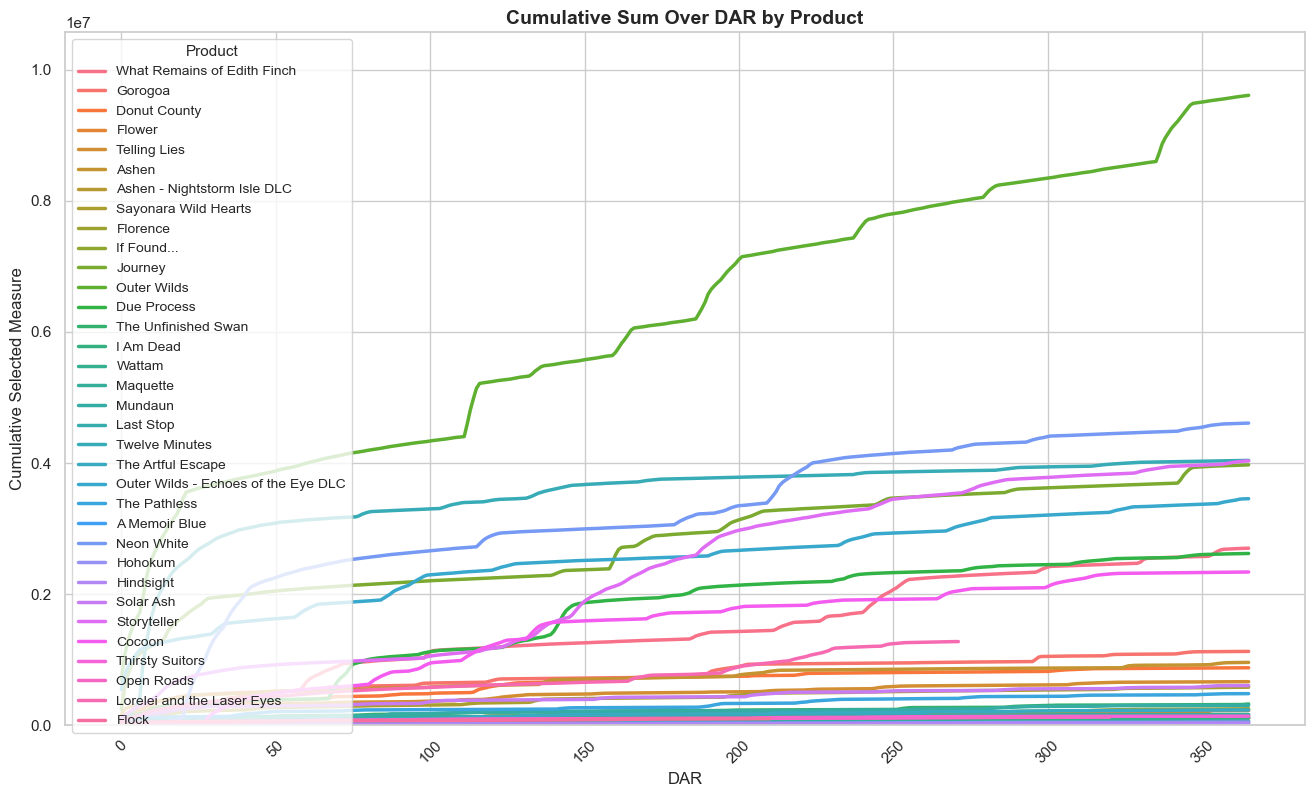

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(16, 9))
ax = sns.lineplot(data=title, x='DAR', y='Cumulative Selected Measure', hue='product', linewidth=2.5)

# Improve labels and title
ax.set_xlabel("DAR", fontsize=12)
ax.set_ylabel("Cumulative Selected Measure", fontsize=12)
ax.set_title("Cumulative Sum Over DAR by Product", fontsize=14, fontweight='bold')

# Improve legend
ax.legend(title="Product", fontsize=10, title_fontsize=11, loc="upper left", frameon=True)

# Rotate x-axis if needed
plt.xticks(rotation=45)

plt.ylim(0,title['Cumulative Selected Measure'].max()*1.1)
# Show plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


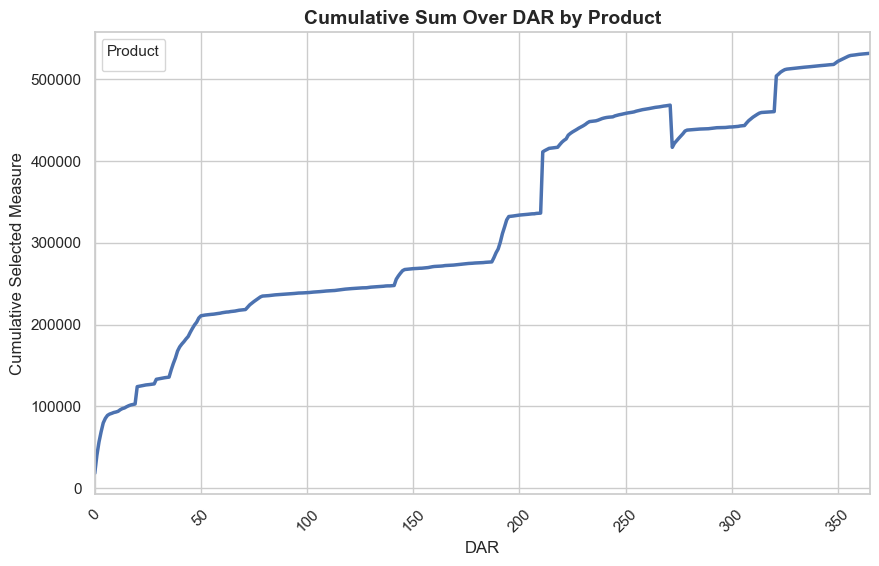

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=median_df, x='DAR', y='Cumulative Selected Measure', linewidth=2.5)

# Improve labels and title
ax.set_xlabel("DAR", fontsize=12)
ax.set_ylabel("Cumulative Selected Measure", fontsize=12)
ax.set_title("Cumulative Sum Over DAR by Product", fontsize=14, fontweight='bold')

# Improve legend
ax.legend(title="Product", fontsize=10, title_fontsize=11, loc="upper left", frameon=True)

# Rotate x-axis if needed
plt.xticks(rotation=45)

plt.xlim(0,365)
# Show plot
plt.show()

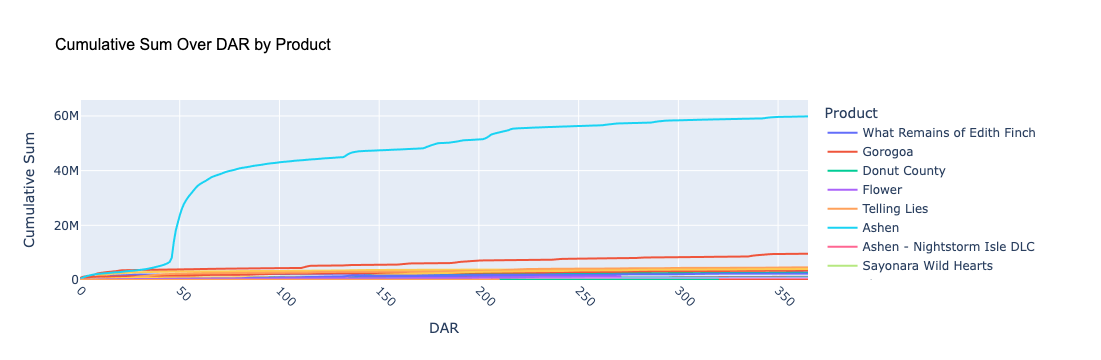

In [21]:
import plotly.express as px

# Create interactive plot
fig = px.line(
    df_combined,
    x="DAR",
    y="Cumulative Selected Measure",
    color="product",
    title="Cumulative Sum Over DAR by Product",
    labels={"DAR": "DAR", "Cumulative Sum": "Cumulative Sum", "product": "Product"},
    line_shape="linear"
)

# Improve layout
fig.update_layout(
    xaxis_title="DAR",
    yaxis_title="Cumulative Sum",
    title_font=dict(size=16, family="Arial", color="black"),
    legend_title_text="Product",
    xaxis=dict(tickangle=45, range=[0,365]),
    yaxis=dict(range=[0, df_combined["Cumulative Selected Measure"].max() * 1.1])
)

# Show interactive plot
fig.show()

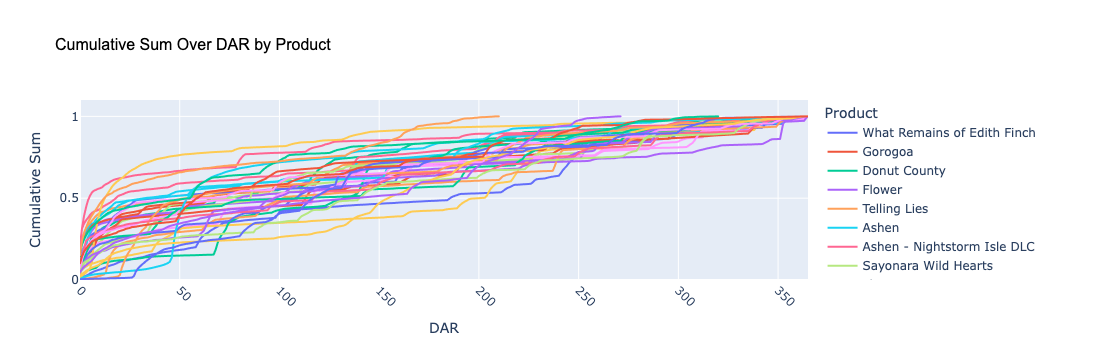

In [22]:
import plotly.express as px

# Create interactive plot
fig = px.line(
    df_combined,
    x="DAR",
    y="prop_of_total",
    color="product",
    title="Cumulative Sum Over DAR by Product",
    labels={"DAR": "DAR", "Cumulative Sum": "Cumulative Sum", "product": "Product"},
    line_shape="linear"
)

# Improve layout
fig.update_layout(
    xaxis_title="DAR",
    yaxis_title="Cumulative Sum",
    title_font=dict(size=16, family="Arial", color="black"),
    legend_title_text="Product",
    xaxis=dict(tickangle=45, range=[0,365]),
    yaxis=dict(range=[0, 1.1])
)

# Show interactive plot
fig.show()

## Functionitizing Charts

In [24]:
len(df_combined['product'].unique())

35

In [25]:
Title_Dict = {
    'What Remains of Edith Finch': 4,
    'Gorogoa': 1,
    'Donut County': 1,
    'Flower': 2,
    'Telling Lies': 1,
    'Ashen': 1,
    'Ashen - Nightstorm Isle DLC': 1,
    'Sayonara Wild Hearts': 1,
    'Florence': 1,
    'If Found...': 1,
    'Journey': 2,
    'Outer Wilds': 1,
    'Due Process': 1,
    'The Unfinished Swan': 1,
    'I Am Dead': 1,
    'Wattam': 1,
    'Maquette': 1,
    'Mundaun': 1,
    'Last Stop': 1,
    'Twelve Minutes': 1,
    'The Artful Escape': 1,
    'Outer Wilds - Echoes of the Eye DLC': 1,
    'The Pathless': 1,
    'A Memoir Blue': 1,
    'Neon White': 1,
    'Stray': 0,
    'Hohokum': 1,
    'Hindsight': 1,
    'Solar Ash': 1,
    'Storyteller': 1,
    'Cocoon': 1,
    'Thirsty Suitors': 1,
    'Open Roads': 1,
    'Lorelei and the Laser Eyes': 1,
    'Flock': 1
}

In [26]:
import plotly.express as px


def title_revenue_Curves(title_dict):
    df_combined['weight'] = df_combined['product'].map(title_dict)
    chart_df = df_combined.query("weight >=1")

    # Create interactive plot
    fig = px.line(
        chart_df,
        x="DAR",
        y="Cumulative Selected Measure",
        color="product",
        title="Cumulative Sum Over DAR by Product",
        labels={"DAR": "DAR", "Cumulative Sum": "Cumulative Sum", "product": "Product"},
        line_shape="linear"
    )
    
    # Improve layout
    fig.update_layout(
        xaxis_title="DAR",
        yaxis_title="Cumulative Sum",
        title_font=dict(size=16, family="Arial", color="black"),
        legend_title_text="Product",
        xaxis=dict(tickangle=45, range=[0,365]),
        yaxis=dict(range=[0, chart_df["Cumulative Selected Measure"].max() * 1.1])
    )
    
    # Show interactive plot
    fig.show()


    # Create interactive plot
    fig = px.line(
        chart_df,
        x="DAR",
        y="prop_of_total",
        color="product",
        title="Cumulative Sum Over DAR by Product",
        labels={"DAR": "DAR", "Cumulative Sum": "Cumulative Sum", "product": "Product"},
        line_shape="linear"
    )
    
    # Improve layout
    fig.update_layout(
        xaxis_title="DAR",
        yaxis_title="Cumulative Sum",
        title_font=dict(size=16, family="Arial", color="black"),
        legend_title_text="Product",
        xaxis=dict(tickangle=45, range=[0,365]),
        yaxis=dict(range=[0, 1.1])
    )
    
    # Show interactive plot
    fig.show()

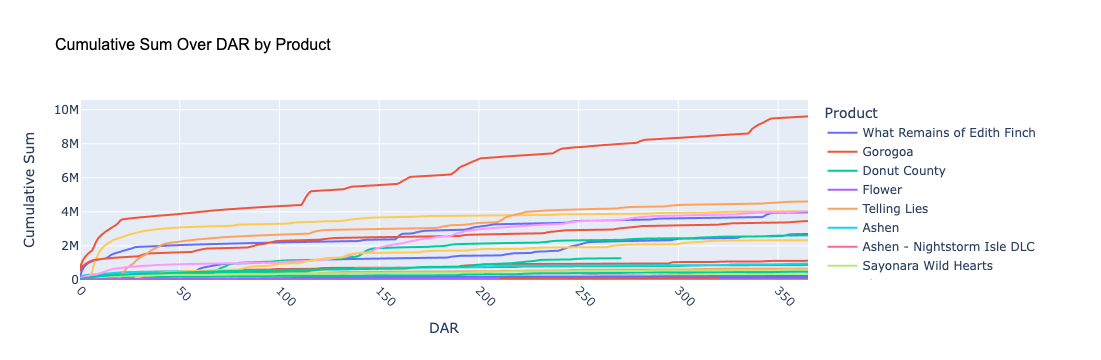

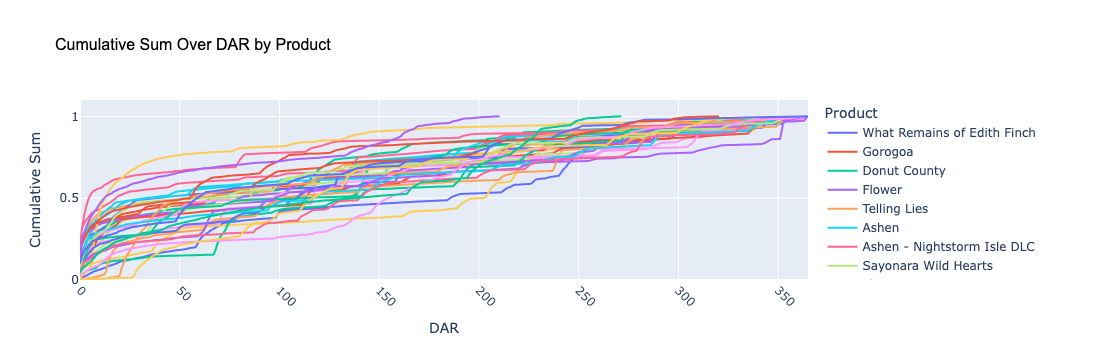

In [27]:
title_revenue_Curves(Title_Dict)

In [28]:
df_combined.groupby("DAR")[["Cumulative Selected Measure", 'prop_of_total']].mean()


Cumulative Selected Measure  prop_of_total
DAR                                            
0                   7.855909e+04       0.070381
1                   1.360161e+05       0.116020
2                   1.705124e+05       0.143195
3                   1.976037e+05       0.163627
4                   2.210323e+05       0.181458
..                           ...            ...
361                 3.271318e+06       0.996353
362                 3.272748e+06       0.997032
363                 3.273979e+06       0.997680
364                 3.275281e+06       0.998911
365                 3.276611e+06       1.000000

[366 rows x 2 columns]

In [29]:
import plotly.express as px
import numpy as np

def combined_revenue_Curves(title_dict):
    df_combined['weight'] = df_combined['product'].map(title_dict).fillna(0)  # Default to 0 if not in dict
    
    # Filter products with weight >= 1
    chart_df = df_combined#.query("weight >= 1")

    # Compute weighted mean using the assigned weights
    chart_df = (
        chart_df
        .groupby("DAR")
        .apply(lambda g: 
            pd.Series({
                "Cumulative Selected Measure": np.average(g["Cumulative Selected Measure"], weights=g["weight"]),
                "prop_of_total": np.average(g["prop_of_total"], weights=g["weight"])
            })
        )
        .reset_index()
    )

    # Create interactive plot for Cumulative Selected Measure
    fig = px.line(
        chart_df,
        x="DAR",
        y="Cumulative Selected Measure",
        title="Cumulative Sum Over DAR by Product",
        labels={"DAR": "DAR", "Cumulative Selected Measure": "Cumulative Sum"},
        line_shape="linear"
    )
    
    # Improve layout
    fig.update_layout(
        xaxis_title="DAR",
        yaxis_title="Cumulative Sum",
        title_font=dict(size=16, family="Arial", color="black"),
        legend_title_text="Product",
        xaxis=dict(tickangle=45, range=[0,365]),
        yaxis=dict(range=[0, chart_df["Cumulative Selected Measure"].max() * 1.1])
    )
    
    fig.show()

    # Create interactive plot for prop_of_total
    fig = px.line(
        chart_df,
        x="DAR",
        y="prop_of_total",
        title="Proportion of Total Over DAR by Product",
        labels={"DAR": "DAR", "prop_of_total": "Proportion"},
        line_shape="linear"
    )
    
    fig.update_layout(
        xaxis_title="DAR",
        yaxis_title="Proportion",
        title_font=dict(size=16, family="Arial", color="black"),
        legend_title_text="Product",
        xaxis=dict(tickangle=45, range=[0,365]),
        yaxis=dict(range=[0, 1.1])
    )
    
    fig.show()
    return chart_df

/var/folders/vh/qvl8gx_d2m370qv72srt5r1m0000gp/T/ipykernel_3043/2035603541.py:14: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



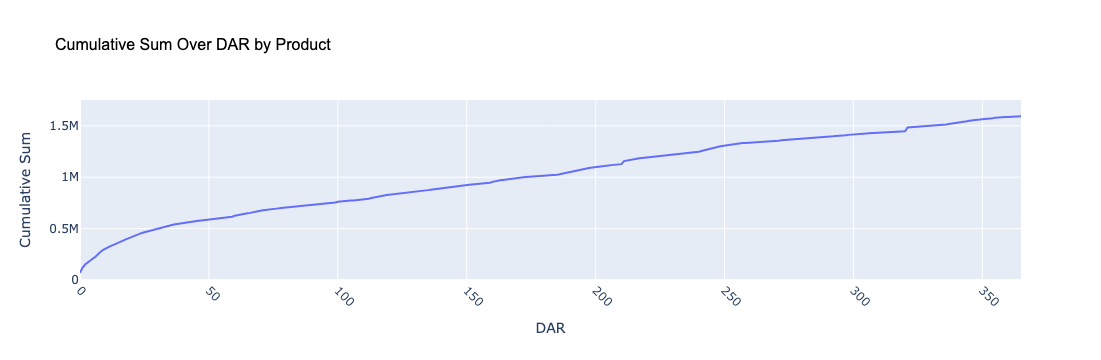

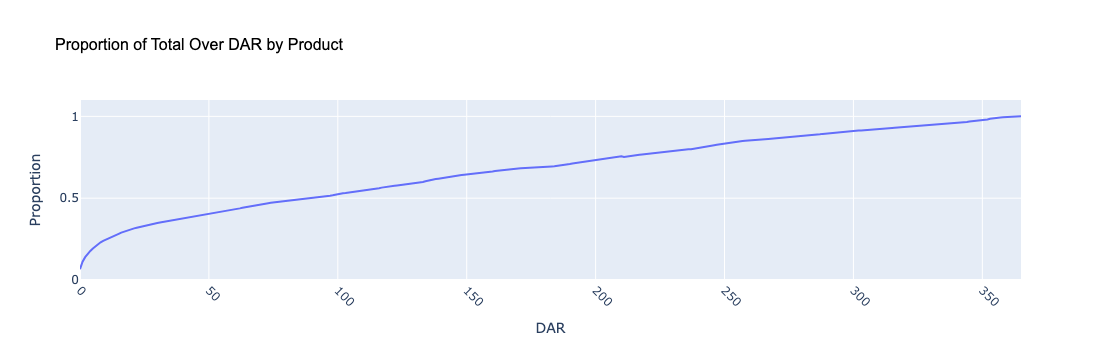

In [30]:
chart_df = combined_revenue_Curves(Title_Dict)

In [31]:
temp_table = chart_df.iloc[0::7]

In [32]:
temp_table.to_csv("steam.csv")

In [33]:
stop


NameError: name 'stop' is not defined

In [45]:
# Define folder path
folder_path = "/Users/dougs/Documents/GitHub/IndieBI-Sales-EDA/"

# Get all .xlsx files in the folder
files = glob.glob(f"{folder_path}/*.csv")

# Read all files into DataFrames and add filename column
csvs = [pd.read_csv(file).assign(Source=os.path.basename(file)) for file in files]

# Combine all DataFrames
df_combined = pd.concat(csvs, ignore_index=True)

In [47]:
df_combined

Unnamed: 0  DAR  Cumulative Selected Measure  prop_of_total     Source
0             0    0                 1.348268e+04       0.034283     ps.csv
1             7    7                 5.929897e+04       0.146996     ps.csv
2            14   14                 8.040648e+04       0.199761     ps.csv
3            21   21                 1.038582e+05       0.239846     ps.csv
4            28   28                 1.261630e+05       0.281667     ps.csv
..          ...  ...                          ...            ...        ...
207         336  336                 1.513672e+06       0.952075  steam.csv
208         343  343                 1.537481e+06       0.963114  steam.csv
209         350  350                 1.561432e+06       0.975061  steam.csv
210         357  357                 1.582889e+06       0.993673  steam.csv
211         364  364                 1.590916e+06       0.998951  steam.csv

[212 rows x 5 columns]

In [49]:
import plotly.express as px
import numpy as np

def SKU_curves(df):
    
    # Filter products with weight >= 1
    chart_df = df

    # Create interactive plot for Cumulative Selected Measure
    fig = px.line(
        chart_df,
        x="DAR",
        y="Cumulative Selected Measure",
        color='Source',
        title="Cumulative Sum Over DAR by Product",
        labels={"DAR": "DAR", "Cumulative Selected Measure": "Cumulative Sum"},
        line_shape="linear"
    )
    
    # Improve layout
    fig.update_layout(
        xaxis_title="DAR",
        yaxis_title="Cumulative Sum",
        title_font=dict(size=16, family="Arial", color="black"),
        legend_title_text="Product",
        xaxis=dict(tickangle=45, range=[0,365]),
        yaxis=dict(range=[0, chart_df["Cumulative Selected Measure"].max() * 1.1])
    )
    fig.write_html("pages/SKU_CUME.html")
    fig.show()

    # Create interactive plot for prop_of_total
    fig = px.line(
        chart_df,
        x="DAR",
        y="prop_of_total",
        color ='Source',
        title="Proportion of Total Over DAR by Product",
        labels={"DAR": "DAR", "prop_of_total": "Proportion"},
        line_shape="linear"
    )
    
    fig.update_layout(
        xaxis_title="DAR",
        yaxis_title="Proportion",
        title_font=dict(size=16, family="Arial", color="black"),
        legend_title_text="Product",
        xaxis=dict(tickangle=45, range=[0,365]),
        yaxis=dict(range=[0, 1.1])
    )
    fig.write_html("pages/SKU_PROP.html")
    fig.show()


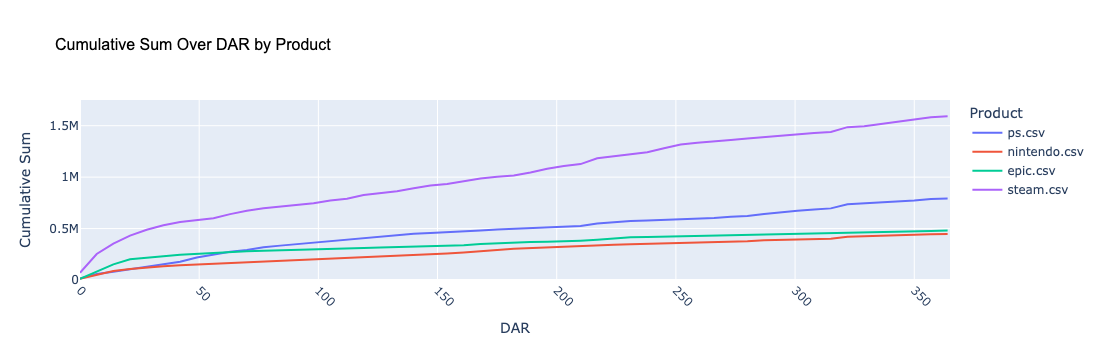

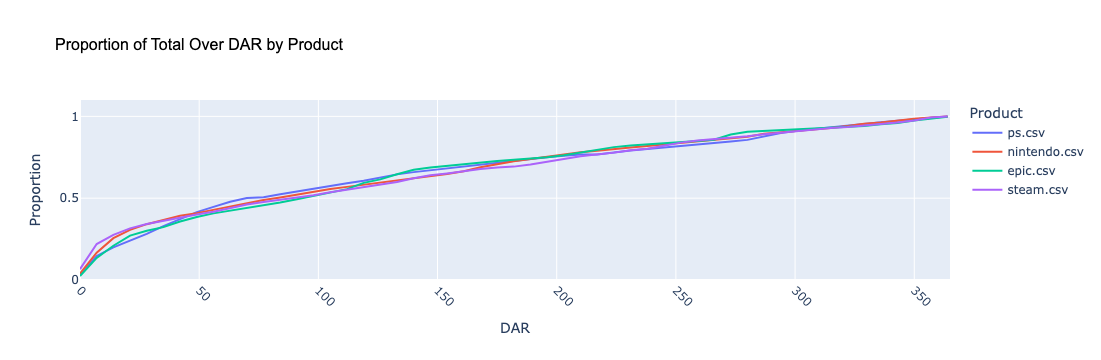

In [51]:
SKU_curves(df_combined)